In [1]:
pip install numpy pandas matplotlib seaborn scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: C:\Users\Артем\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd

# укажи свой путь и имя файла
file_path = "C:/Users/Артем/Desktop/Дома.xlsm"


In [3]:
pip install openpyxl


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: C:\Users\Артем\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
df = pd.read_excel(file_path, engine="openpyxl")

# посмотреть первые строки
print(df.head())

  shortname_region formalname_region shortname_city formalname_city  \
0             Респ            Адыгея              г        Адыгейск   
1             Респ            Адыгея              г        Адыгейск   
2             Респ            Адыгея              г        Адыгейск   
3             Респ            Адыгея              г        Адыгейск   
4             Респ            Адыгея              г        Адыгейск   

                                          address  built_year  \
0                Респ. Адыгея, г. Адыгейск, д. 66         NaN   
1    Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 7         NaN   
2   Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 54         NaN   
3  Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 388         NaN   
4  Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 785      2008.0   

   exploitation_start_year project_type           house_type is_alarm  ...  \
0                      NaN          NaN                  NaN      Нет  ...   
1                      NaN

In [5]:
df.head()

,shortname_region,formalname_region,shortname_city,formalname_city,address,built_year,exploitation_start_year,project_type,house_type,is_alarm,...,heating_type,hot_water_type,cold_water_type,sewerage_type,sewerage_cesspools_volume,gas_type,ventilation_type,firefighting_type,drainage_type,energy_efficiency_predict
0,Респ,Адыгея,г,Адыгейск,"Респ. Адыгея, г. Адыгейск, д. 66",NaN,NaN,NaN,NaN,Нет,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C
1,Респ,Адыгея,г,Адыгейск,"Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 7",NaN,NaN,NaN,NaN,Нет,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C
2,Респ,Адыгея,г,Адыгейск,"Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 54",NaN,NaN,NaN,NaN,Нет,...,NaN,NaN,NaN,NaN,NaN,Автономное,NaN,NaN,NaN,F
3,Респ,Адыгея,г,Адыгейск,"Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 388",NaN,NaN,NaN,NaN,Нет,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C
4,Респ,Адыгея,г,Адыгейск,"Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 785",2008.0,2000.0,1963,Многоквартирный дом,Нет,...,"Автономная котельная (крышная, встроенно-прист...",Закрытая с приготовлением горячей воды на ЦТП,Автономное,Отсутствует,198654.2,Отсутствует,Приточная вентиляция,Пожарные гидранты,Внутренние водостоки,B++


In [6]:
df.columns

Index(['shortname_region', 'formalname_region', 'shortname_city',
       'formalname_city', 'address', 'built_year', 'exploitation_start_year',
       'project_type', 'house_type', 'is_alarm', 'floor_count_max',
       'entrance_count', 'elevators_count', 'energy_efficiency', 'area_total',
       'area_residential', 'area_non_residential', 'foundation_type',
       'floor_type', 'wall_material', 'basement_area', 'chute_type',
       'chute_count', 'electrical_type', 'electrical_entries_count',
       'heating_type', 'hot_water_type', 'cold_water_type', 'sewerage_type',
       'sewerage_cesspools_volume', 'gas_type', 'ventilation_type',
       'firefighting_type', 'drainage_type', 'energy_efficiency_predict'],
      dtype='object')

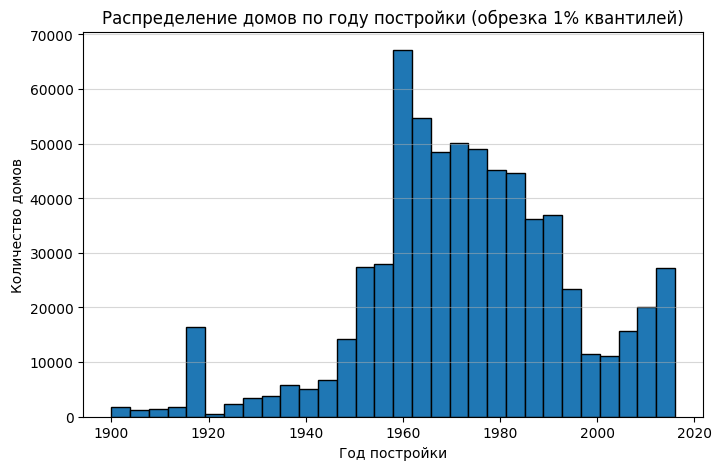

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# приводим built_year к числам
df["built_year"] = pd.to_numeric(df["built_year"], errors="coerce")

# считаем пороги
low = df["built_year"].quantile(0.01)
high = df["built_year"].quantile(0.99)

# фильтруем данные
df_filtered = df[(df["built_year"] >= low) & (df["built_year"] <= high)]

# строим гистограмму
plt.figure(figsize=(8,5))
plt.hist(df_filtered["built_year"].dropna(), bins=30, edgecolor="black")

plt.title("Распределение домов по году постройки (обрезка 1% квантилей)")
plt.xlabel("Год постройки")
plt.ylabel("Количество домов")
plt.grid(axis="y", alpha=0.5)

plt.show()


In [8]:
df["built_year"] = pd.to_numeric(df["built_year"], errors="coerce")

avg_years = df.groupby("energy_efficiency")["built_year"].mean()
print(avg_years)

energy_efficiency
A      1986.439961
A+     2011.112540
A++    2003.127660
B      1994.390359
B+     2002.612018
B++    1977.093329
C      1991.621804
D      1971.334322
E      1969.762234
F      1963.611791
G      1968.026744
Name: built_year, dtype: float64


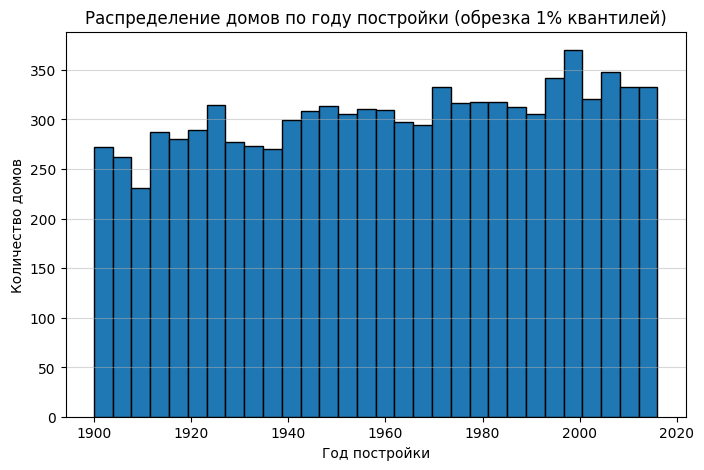

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# приводим built_year к числам
df["area_total"] = pd.to_numeric(df["area_total"], errors="coerce")

# считаем пороги
low = df["built_year"].quantile(0.01)
high = df["built_year"].quantile(0.99)

# фильтруем данные
df_filtered = df[(df["area_total"] >= low) & (df["area_total"] <= high)]

# строим гистограмму
plt.figure(figsize=(8,5))
plt.hist(df_filtered["area_total"].dropna(), bins=30, edgecolor="black")

plt.title("Распределение домов по году постройки (обрезка 1% квантилей)")
plt.xlabel("Год постройки")
plt.ylabel("Количество домов")
plt.grid(axis="y", alpha=0.5)

plt.show()


In [10]:
df.head()

,shortname_region,formalname_region,shortname_city,formalname_city,address,built_year,exploitation_start_year,project_type,house_type,is_alarm,...,heating_type,hot_water_type,cold_water_type,sewerage_type,sewerage_cesspools_volume,gas_type,ventilation_type,firefighting_type,drainage_type,energy_efficiency_predict
0,Респ,Адыгея,г,Адыгейск,"Респ. Адыгея, г. Адыгейск, д. 66",NaN,NaN,NaN,NaN,Нет,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C
1,Респ,Адыгея,г,Адыгейск,"Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 7",NaN,NaN,NaN,NaN,Нет,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C
2,Респ,Адыгея,г,Адыгейск,"Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 54",NaN,NaN,NaN,NaN,Нет,...,NaN,NaN,NaN,NaN,NaN,Автономное,NaN,NaN,NaN,F
3,Респ,Адыгея,г,Адыгейск,"Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 388",NaN,NaN,NaN,NaN,Нет,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C
4,Респ,Адыгея,г,Адыгейск,"Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 785",2008.0,2000.0,1963,Многоквартирный дом,Нет,...,"Автономная котельная (крышная, встроенно-прист...",Закрытая с приготовлением горячей воды на ЦТП,Автономное,Отсутствует,198654.2,Отсутствует,Приточная вентиляция,Пожарные гидранты,Внутренние водостоки,B++


In [11]:
df_cut = df[['formalname_region', 'built_year', 'energy_efficiency', 'area_total']]

In [12]:
df_cut

,formalname_region,built_year,energy_efficiency,area_total
0,Адыгея,NaN,C,8.0
1,Адыгея,NaN,C,NaN
2,Адыгея,NaN,F,7890.0
3,Адыгея,NaN,C,NaN
4,Адыгея,2008.0,B++,76.7
...,...,...,...,...
1026337,Севастополь,1946.0,C,614.2
1026338,Севастополь,1950.0,C,348.1
1026339,Севастополь,1955.0,C,632.5
1026340,Севастополь,2018.0,A,2203.4


In [13]:
regions = [
    "Архангельская",
    "Вологодская",
    "Санкт-Петербург",
    "Калининградская",
    "Ленинградская",
    "Мурманская",
    "Ненецкий",
    "Новгородская",
    "Псковская",
    "Карелия",
    "Коми"
]

df_cut = df_cut[df_cut["formalname_region"].isin(regions)]

In [14]:
df_cut

,formalname_region,built_year,energy_efficiency,area_total
35173,Карелия,1939.0,F,48.70
35174,Карелия,NaN,C,NaN
35175,Карелия,1976.0,E,4101.50
35176,Карелия,1930.0,F,257.50
35177,Карелия,2017.0,D,1083.80
...,...,...,...,...
1020414,Ненецкий,2006.0,D,7768.40
1020415,Ненецкий,2013.0,D,6434.43
1020416,Ненецкий,2013.0,D,2133.33
1020417,Ненецкий,2013.0,D,2153.70


In [15]:
df_cut.isna().sum()

formalname_region        0
built_year           52083
energy_efficiency        0
area_total           23134
dtype: int64

In [16]:
df_cut_cleaned = df_cut.dropna()


In [17]:
coeffs = {
    "A++": 0.4,
    "A+": 0.5,
    "A": 0.6,
    "B++": 0.63,
    "B+": 0.66,
    "B": 0.7,
    "C": 0.85,
    "D": 1,
    "E": 1.25,
    "F": 1.5,
    "G": 1.75
}

# создаём новый столбец
df_cut_cleaned["area_eff"] = df_cut_cleaned["area_total"] * df_cut_cleaned["energy_efficiency"].map(coeffs)


C:\Users\Артем\AppData\Local\Temp\ipykernel_13732\2022551181.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cut_cleaned["area_eff"] = df_cut_cleaned["area_total"] * df_cut_cleaned["energy_efficiency"].map(coeffs)


In [18]:
df_cut_cleaned

,formalname_region,built_year,energy_efficiency,area_total,area_eff
35173,Карелия,1939.0,F,48.70,73.050
35175,Карелия,1976.0,E,4101.50,5126.875
35176,Карелия,1930.0,F,257.50,386.250
35177,Карелия,2017.0,D,1083.80,1083.800
35178,Карелия,1983.0,F,867.90,1301.850
...,...,...,...,...,...
1020414,Ненецкий,2006.0,D,7768.40,7768.400
1020415,Ненецкий,2013.0,D,6434.43,6434.430
1020416,Ненецкий,2013.0,D,2133.33,2133.330
1020417,Ненецкий,2013.0,D,2153.70,2153.700


In [19]:
df_filtered_cut_cleaned = (
    df_cut_cleaned
    .groupby(["formalname_region", "built_year", "energy_efficiency"], as_index=False)
    .agg({"area_eff": "sum"})
    .sort_values(["formalname_region", "built_year"])
)


In [20]:
df_filtered_cut_cleaned

,formalname_region,built_year,energy_efficiency,area_eff
0,Архангельская,0.0,E,5285.125
1,Архангельская,1695.0,F,846.150
2,Архангельская,1698.0,F,784.950
3,Архангельская,1846.0,B++,180.936
4,Архангельская,1885.0,F,262.200
...,...,...,...,...
5730,Санкт-Петербург,2020.0,B+,21585.960
5731,Санкт-Петербург,2020.0,C,55621.620
5732,Санкт-Петербург,2021.0,B,110995.780
5733,Санкт-Петербург,2021.0,C,28640.835


In [21]:
import pandas as pd

# группировка и сумма по срезу
df_grouped = (
    df_filtered_cut_cleaned
    .groupby(["formalname_region", "built_year"], as_index=False)
    .agg({"area_eff": "sum"})
    .sort_values(["formalname_region", "built_year"])
)

# накопительная сумма по региону (и при желании — по energy_efficiency отдельно)
df_grouped["area_eff_cumsum"] = (
    df_grouped
    .groupby(["formalname_region"])["area_eff"]
    .cumsum()
)

df_grouped


,formalname_region,built_year,area_eff,area_eff_cumsum
0,Архангельская,0.0,5.285125e+03,5.285125e+03
1,Архангельская,1695.0,8.461500e+02,6.131275e+03
2,Архангельская,1698.0,7.849500e+02,6.916225e+03
3,Архангельская,1846.0,1.809360e+02,7.097161e+03
4,Архангельская,1885.0,2.622000e+02,7.359361e+03
...,...,...,...,...
1339,Санкт-Петербург,2018.0,3.083640e+06,1.603656e+08
1340,Санкт-Петербург,2019.0,1.956438e+06,1.623220e+08
1341,Санкт-Петербург,2020.0,1.916696e+05,1.625137e+08
1342,Санкт-Петербург,2021.0,1.396366e+05,1.626533e+08


In [22]:
df_grouped[(df_grouped['formalname_region'] == 'Москва') & (df_grouped['built_year'] == 1999)] 

,formalname_region,built_year,area_eff,area_eff_cumsum


In [23]:
df_grouped.head()

,formalname_region,built_year,area_eff,area_eff_cumsum
0,Архангельская,0.0,5285.125,5285.125
1,Архангельская,1695.0,846.150,6131.275
2,Архангельская,1698.0,784.950,6916.225
3,Архангельская,1846.0,180.936,7097.161
4,Архангельская,1885.0,262.200,7359.361


In [24]:
import pandas as pd

data_climate = {
    "Год": list(range(1960, 2061)),
    "Зима": [
        -13.79, -13.80, -14.37, -14.32, -13.64, -14.17, -13.94, -14.61, -13.96, -13.86,
        -13.82, -14.12, -14.06, -14.16, -14.75, -13.79, -13.72, -14.03, -14.16, -13.53,
        -13.65, -13.86, -13.16, -13.98, -14.67, -13.02, -12.79, -13.10, -13.40, -12.73,
        -12.36, -13.16, -12.06, -13.49, -13.16, -13.43, -12.51, -12.85, -12.90, -12.71,
        -12.43, -12.14, -12.50, -12.00, -12.32, -12.59, -11.45, -12.35, -11.07, -11.58,
        -11.76, -12.29, -12.19, -10.94, -11.14, -11.76, -10.86, -11.03, -11.95, -10.92,
        -10.77, -11.26, -9.98, -10.88, -11.19, -10.47, -11.03, -9.66, -10.00, -9.90,
        -10.54, -10.26, -9.82, -9.73, -10.04, -9.28, -9.39, -10.04, -9.55, -9.07,
        -8.86, -9.35, -9.39, -9.30, -9.75, -9.44, -9.81, -8.69, -8.51, -9.11,
        -8.47, -8.92, -9.21, -8.81, -9.21, -9.01, -8.60, -8.84, -8.70, -8.00,
        -7.94
    ]
}

df_nwfo_climate = pd.DataFrame(data_climate)
df_nwfo_climate

,Год,Зима
0,1960,-13.79
1,1961,-13.80
2,1962,-14.37
3,1963,-14.32
4,1964,-13.64
...,...,...
96,2056,-8.60
97,2057,-8.84
98,2058,-8.70
99,2059,-8.00


In [25]:

data_region_heat = {
    "Республика Карелия": [
        2432.6, 2402, 2389.3, 2194.6, 2366.1, 2512.7, 2477.2, 2481.7, 2369.2, 2342.8,
        2397.9, 2042.1, 2334.4, 2355.4, 2128.8, 1942, 2056.50, 2075.8, 2038.9, 2198.32,
        2197.34, 2330.92, 2340.1, 2226.8, 2251.5
    ],
    "Республика Коми": [
        4893.8, 4324.3, 4530.5, 4474.1, 5563, 4920.1, 5796.5, 5772.2, 5398.7, 5427.0,
        5264.7, 4723.7, 4972.6, 4891.4, 4821.7, 4874.4, 4700.90, 4514.9, 4669.2, 4599.82,
        4481.15, 4541.67, 4519.7, 4412.5, 4303.4
    ],
    "Архангельская область": [
        6119.9, 5555.3, 5469.7, 5228.1, 5432.3, 5455.3, 5513.0, 5482.1, 5341.1, 5386.1,
        5500.5, 5237.5, 5261.2, 4842.6, 4791.4, 4792.1, 4921.60, 4974.9, 4861.7, 4868.03,
        4729.35, 5050.46, 5027.0, 4897.0, 4930.6
    ],
    "Ненецкий авт.округ": [
        82.7, 92.4, 86.2, 87, 88, 103, 114.1, 179.9, 176.0, 190.9,
        190.5, 173.2, 190.3, 190.1, 204.4, 198.3, 196.40, 165.6, 196.4, 197.29,
        183.93, 181.85, 177.0, 174.8, 175.0
    ],
    "Вологодская область": [
        3579.7, 3548.8, 3458.4, 3218.4, 5217.7, 5079.4, 4470.1, 4850.6, 4617.3, 4761.1,
        5305.5, 4896.8, 5042.1, 4800.7, 4576.4, 4690.7, 4974.60, 4948.6, 4779.4, 4613.63,
        4579.44, 5031.83, 5071.2, 4798.3, 4817.7
    ],
    "Калининградская область": [
        2097.5, 2191, 2457.3, 2468.8, 2401.7, 2282.8, 2259.2, 2228.6, 2166.0, 2174.5,
        2399.8, 2193.8, 2185.3, 2047.5, 1756.3, 1797.5, 1782.70, 1883.4, 1738.7, 1760.11,
        1794.78, 1940.78, 1804.1, 1710.3, 1730.5
    ],
    "Ленинградская область": [
        6574.9, 6979.6, 7137.8, 7229.6, 7222.3, 7112.8, 6788.9, 6889.2, 6805.3, 7377.3,
        7593.0, 6901.6, 7149.6, 6825.9, 6764.6, 6364, 6890.90, 7049.1, 7148, 7187.15,
        7300.29, 8090.48, 8075.5, 8126.8, 8367.5
    ],
    "Мурманская область": [
        6033.7, 6903.9, 7045, 6545.2, 6682.9, 6353.1, 6224.0, 6263, 6236.7, 6474.5,
        6353.0, 5685.3, 5606.1, 5383.8, 5382.4, 5130.8, 5119.10, 5327.2, 5060.2, 5220.04,
        5076.92, 5317.88, 5009.3, 4993.2, 5033.0
    ],
    "Новгородская область": [
        1896.5, 1857.6, 1911.6, 1905.8, 1909.6, 1977.2, 1990.3, 2002.5, 2016.9, 2045.2,
        2019.7, 2002.6, 1963.2, 1983.1, 1862.8, 1863.2, 1909.90, 1967.1, 1982.8, 1833.78,
        1715.66, 1943.49, 1887.9, 1799.3, 1837.8
    ],
    "Псковская область": [
        1396.8, 1571.3, 1868.7, 1921.9, 1924.3, 1940.5, 1823.4, 1785.6, 1701.5, 1773.9,
        1895.2, 1664.0, 1752.3, 1665.9, 1620.4, 1556.2, 1743.70, 1746.4, 1764.3, 1685.65,
        1662.29, 1865.57, 1846.6, 1766.1, 1766.3
    ],
    "г.Санкт-Петербург": [
        25145.2, 26182.8, 27794.5, 27997.7, 26717.8, 26183, 26478.3, 27198.7, 25984.3, 26853.8,
        28249.0, 26592.3, 27459.3, 26379.4, 24597.1, 23633.8, 25441.60, 25584.5, 26298.3, 25304.21,
        24670.84, 28080.97, 27706.3, 27192.9, 27721.3
    ]
}


years = list(range(2000, 2025))  # 2000–2024
df_region_heat = pd.DataFrame(data_region_heat, index=years)

df_region_heat.T

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
Республика Карелия,2432.6,2402.0,2389.3,2194.6,2366.1,2512.7,2477.2,2481.7,2369.2,2342.8,...,1942.0,2056.5,2075.8,2038.9,2198.32,2197.34,2330.92,2340.1,2226.8,2251.5
Республика Коми,4893.8,4324.3,4530.5,4474.1,5563.0,4920.1,5796.5,5772.2,5398.7,5427.0,...,4874.4,4700.9,4514.9,4669.2,4599.82,4481.15,4541.67,4519.7,4412.5,4303.4
Архангельская область,6119.9,5555.3,5469.7,5228.1,5432.3,5455.3,5513.0,5482.1,5341.1,5386.1,...,4792.1,4921.6,4974.9,4861.7,4868.03,4729.35,5050.46,5027.0,4897.0,4930.6
Ненецкий авт.округ,82.7,92.4,86.2,87.0,88.0,103.0,114.1,179.9,176.0,190.9,...,198.3,196.4,165.6,196.4,197.29,183.93,181.85,177.0,174.8,175.0
Вологодская область,3579.7,3548.8,3458.4,3218.4,5217.7,5079.4,4470.1,4850.6,4617.3,4761.1,...,4690.7,4974.6,4948.6,4779.4,4613.63,4579.44,5031.83,5071.2,4798.3,4817.7
Калининградская область,2097.5,2191.0,2457.3,2468.8,2401.7,2282.8,2259.2,2228.6,2166.0,2174.5,...,1797.5,1782.7,1883.4,1738.7,1760.11,1794.78,1940.78,1804.1,1710.3,1730.5
Ленинградская область,6574.9,6979.6,7137.8,7229.6,7222.3,7112.8,6788.9,6889.2,6805.3,7377.3,...,6364.0,6890.9,7049.1,7148.0,7187.15,7300.29,8090.48,8075.5,8126.8,8367.5
Мурманская область,6033.7,6903.9,7045.0,6545.2,6682.9,6353.1,6224.0,6263.0,6236.7,6474.5,...,5130.8,5119.1,5327.2,5060.2,5220.04,5076.92,5317.88,5009.3,4993.2,5033.0
Новгородская область,1896.5,1857.6,1911.6,1905.8,1909.6,1977.2,1990.3,2002.5,2016.9,2045.2,...,1863.2,1909.9,1967.1,1982.8,1833.78,1715.66,1943.49,1887.9,1799.3,1837.8
Псковская область,1396.8,1571.3,1868.7,1921.9,1924.3,1940.5,1823.4,1785.6,1701.5,1773.9,...,1556.2,1743.7,1746.4,1764.3,1685.65,1662.29,1865.57,1846.6,1766.1,1766.3


In [26]:
df_grouped

,formalname_region,built_year,area_eff,area_eff_cumsum
0,Архангельская,0.0,5.285125e+03,5.285125e+03
1,Архангельская,1695.0,8.461500e+02,6.131275e+03
2,Архангельская,1698.0,7.849500e+02,6.916225e+03
3,Архангельская,1846.0,1.809360e+02,7.097161e+03
4,Архангельская,1885.0,2.622000e+02,7.359361e+03
...,...,...,...,...
1339,Санкт-Петербург,2018.0,3.083640e+06,1.603656e+08
1340,Санкт-Петербург,2019.0,1.956438e+06,1.623220e+08
1341,Санкт-Петербург,2020.0,1.916696e+05,1.625137e+08
1342,Санкт-Петербург,2021.0,1.396366e+05,1.626533e+08


In [27]:
df_merged = df_grouped.merge(
    df_nwfo_climate.rename(columns={"Год": "built_year", "Зима": "climate_winter"}),
    on="built_year",
    how="left"
)

In [28]:
df_merged

,formalname_region,built_year,area_eff,area_eff_cumsum,climate_winter
0,Архангельская,0.0,5.285125e+03,5.285125e+03,NaN
1,Архангельская,1695.0,8.461500e+02,6.131275e+03,NaN
2,Архангельская,1698.0,7.849500e+02,6.916225e+03,NaN
3,Архангельская,1846.0,1.809360e+02,7.097161e+03,NaN
4,Архангельская,1885.0,2.622000e+02,7.359361e+03,NaN
...,...,...,...,...,...
1339,Санкт-Петербург,2018.0,3.083640e+06,1.603656e+08,-11.95
1340,Санкт-Петербург,2019.0,1.956438e+06,1.623220e+08,-10.92
1341,Санкт-Петербург,2020.0,1.916696e+05,1.625137e+08,-10.77
1342,Санкт-Петербург,2021.0,1.396366e+05,1.626533e+08,-11.26


In [29]:
import re
# функция для очистки названий
def clean_region_name(name: str) -> str:
    # Спец. случай для Питера
    if re.sub(r"\s+", "", name.lower()) in ["г.санкт-петербург", "санкт-петербург"]:
        return "Санкт-Петербург"
    
    # Убираем "Республика ..." в начале
    name = re.sub(r"^Республика\s+", "", name, flags=re.IGNORECASE)
    
    # Убираем "область" в конце
    name = re.sub(r"\s+область$", "", name, flags=re.IGNORECASE)
    
    # Убираем "автономный округ" в конце
    name = re.sub(r"\s+авт\.?\.?\s*округ$", "", name, flags=re.IGNORECASE)
    
    # Убираем "край" в конце
    name = re.sub(r"\s+край$", "", name, flags=re.IGNORECASE)
    
    # Чистим лишние пробелы
    name = " ".join(name.split())
    
    return name

# применяем к df_region_heat
df_heat_long = (
    df_region_heat
    .reset_index(names="built_year")
    .melt(id_vars="built_year", var_name="formalname_region", value_name="heat")
)

df_heat_long["formalname_region"] = df_heat_long["formalname_region"].apply(clean_region_name)

# то же самое для df_merged
df_merged["formalname_region"] = df_merged["formalname_region"].apply(clean_region_name)

# теперь мерж
df_final = df_merged.merge(
    df_heat_long,
    on=["formalname_region", "built_year"],
    how="left"
)

df_final


,formalname_region,built_year,area_eff,area_eff_cumsum,climate_winter,heat
0,Архангельская,0.0,5.285125e+03,5.285125e+03,NaN,NaN
1,Архангельская,1695.0,8.461500e+02,6.131275e+03,NaN,NaN
2,Архангельская,1698.0,7.849500e+02,6.916225e+03,NaN,NaN
3,Архангельская,1846.0,1.809360e+02,7.097161e+03,NaN,NaN
4,Архангельская,1885.0,2.622000e+02,7.359361e+03,NaN,NaN
...,...,...,...,...,...,...
1339,Санкт-Петербург,2018.0,3.083640e+06,1.603656e+08,-11.95,26298.30
1340,Санкт-Петербург,2019.0,1.956438e+06,1.623220e+08,-10.92,25304.21
1341,Санкт-Петербург,2020.0,1.916696e+05,1.625137e+08,-10.77,24670.84
1342,Санкт-Петербург,2021.0,1.396366e+05,1.626533e+08,-11.26,28080.97


In [30]:
df_final

,formalname_region,built_year,area_eff,area_eff_cumsum,climate_winter,heat
0,Архангельская,0.0,5.285125e+03,5.285125e+03,NaN,NaN
1,Архангельская,1695.0,8.461500e+02,6.131275e+03,NaN,NaN
2,Архангельская,1698.0,7.849500e+02,6.916225e+03,NaN,NaN
3,Архангельская,1846.0,1.809360e+02,7.097161e+03,NaN,NaN
4,Архангельская,1885.0,2.622000e+02,7.359361e+03,NaN,NaN
...,...,...,...,...,...,...
1339,Санкт-Петербург,2018.0,3.083640e+06,1.603656e+08,-11.95,26298.30
1340,Санкт-Петербург,2019.0,1.956438e+06,1.623220e+08,-10.92,25304.21
1341,Санкт-Петербург,2020.0,1.916696e+05,1.625137e+08,-10.77,24670.84
1342,Санкт-Петербург,2021.0,1.396366e+05,1.626533e+08,-11.26,28080.97


In [31]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# фильтруем данные с 2000 года
df_norm = df_final[df_final["built_year"] >= 2000].copy()

# выбираем только нужные столбцы
cols_to_scale = ["area_eff_cumsum", "climate_winter"]

scaler = MinMaxScaler()
df_norm[cols_to_scale] = scaler.fit_transform(df_norm[cols_to_scale])

print(df_norm[["built_year", "formalname_region", "area_eff_cumsum", "climate_winter"]].head())


     built_year formalname_region  area_eff_cumsum  climate_winter
111      2000.0     Архангельская         0.129312        0.061303
112      2001.0     Архангельская         0.129480        0.172414
113      2002.0     Архангельская         0.129662        0.034483
114      2003.0     Архангельская         0.129776        0.226054
115      2004.0     Архангельская         0.130046        0.103448


In [32]:
df_norm

,formalname_region,built_year,area_eff,area_eff_cumsum,climate_winter,heat
111,Архангельская,2000.0,3.040229e+04,0.129312,0.061303,6119.90
112,Архангельская,2001.0,2.733522e+04,0.129480,0.172414,5555.30
113,Архангельская,2002.0,2.956210e+04,0.129662,0.034483,5469.70
114,Архангельская,2003.0,1.848811e+04,0.129776,0.226054,5228.10
115,Архангельская,2004.0,4.383192e+04,0.130046,0.103448,5432.30
...,...,...,...,...,...,...
1339,Санкт-Петербург,2018.0,3.083640e+06,0.985468,0.245211,26298.30
1340,Санкт-Петербург,2019.0,1.956438e+06,0.997524,0.639847,25304.21
1341,Санкт-Петербург,2020.0,1.916696e+05,0.998705,0.697318,24670.84
1342,Санкт-Петербург,2021.0,1.396366e+05,0.999565,0.509579,28080.97


Intercept: 4248.874467369421
Coef area_eff_cumsum: 1.4445953546942793e-05
Coef climate_winter: -90.10920934368615


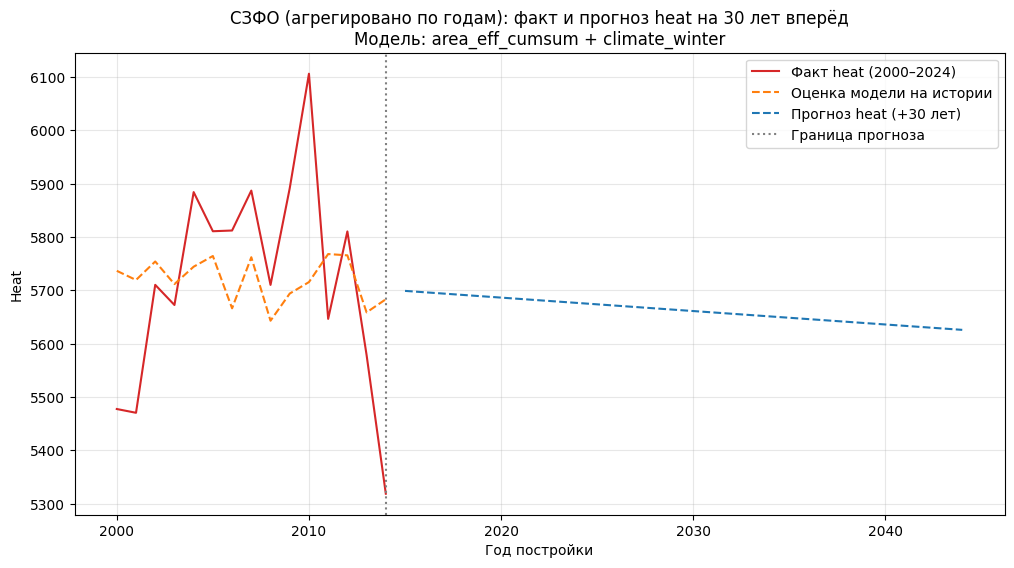

    built_year         heat  area_eff_cumsum  climate_winter    heat_pred  \
5       2005.0  5810.900000     2.638275e+07      -12.590000  5764.473418   
6       2006.0  5812.272727     2.670363e+07      -11.450000  5666.384304   
7       2007.0  5887.110000     2.772088e+07      -12.350000  5762.177773   
8       2008.0  5710.272727     2.746526e+07      -11.070000  5643.145255   
9       2009.0  5891.554545     2.780843e+07      -11.580000  5694.058426   
10      2010.0  6106.254545     2.817448e+07      -11.760000  5715.566061   
11      2011.0  5646.627273     2.850919e+07      -12.290000  5768.159119   
12      2012.0  5810.581818     2.896295e+07      -12.190000  5765.703161   
13      2013.0  5578.709091     2.935711e+07      -10.940000  5658.760666   
14      2014.0  5318.754545     2.981151e+07      -11.140000  5683.346679   
15      2015.0  5699.067470     2.974430e+07      -11.325238          NaN   
16      2016.0  5696.547570     3.003100e+07      -11.251310          NaN   

In [33]:
#СЗФО: регрессия обычная + прогноз на 30 лет вперёд

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

mask = (df_final["built_year"] >= 2000) & (df_final["built_year"] <= 2014)
df_yearly = (
    df_final.loc[mask, ["built_year", "heat", "area_eff_cumsum", "climate_winter"]]
            .groupby("built_year", as_index=False)
            .mean()
)

# 2) интерполяция пропусков
df_yearly[["heat", "area_eff_cumsum", "climate_winter"]] = (
    df_yearly[["heat", "area_eff_cumsum", "climate_winter"]]
    .interpolate(method="linear")
)

# 3) обучение регрессии
X = df_yearly[["area_eff_cumsum", "climate_winter"]]
y = df_yearly["heat"]

reg = LinearRegression()
reg.fit(X, y)

print("Intercept:", reg.intercept_)
print("Coef area_eff_cumsum:", reg.coef_[0])
print("Coef climate_winter:", reg.coef_[1])

# 4) прогноз на 30 лет вперёд
last_year = int(df_yearly["built_year"].max())
future_years = np.arange(last_year + 1, last_year + 31)

# линейная экстраполяция признаков
coef_area = np.polyfit(df_yearly["built_year"], df_yearly["area_eff_cumsum"], 1)
coef_clim = np.polyfit(df_yearly["built_year"], df_yearly["climate_winter"], 1)
area_trend = np.poly1d(coef_area)
clim_trend = np.poly1d(coef_clim)

future_area = area_trend(future_years)
future_climate = clim_trend(future_years)

future_data = pd.DataFrame({
    "built_year": future_years,
    "area_eff_cumsum": future_area,
    "climate_winter": future_climate
})
future_data["heat_pred"] = reg.predict(future_data[["area_eff_cumsum", "climate_winter"]])

# 5) прогноз и история
df_yearly["heat_pred"] = reg.predict(df_yearly[["area_eff_cumsum", "climate_winter"]])

df_all = pd.concat(
    [
        df_yearly.assign(type="Факт"),
        future_data.rename(columns={"heat_pred": "heat"}).assign(type="Прогноз")
    ],
    ignore_index=True
)

# 6) график
plt.figure(figsize=(12,6))
hist = df_all[df_all["type"] == "Факт"]
fut = df_all[df_all["type"] == "Прогноз"]

plt.plot(hist["built_year"], hist["heat"], label="Факт heat (2000–2024)", color="tab:red")
plt.plot(hist["built_year"], hist["heat_pred"], label="Оценка модели на истории", color="tab:orange", linestyle="--")
plt.plot(fut["built_year"], fut["heat"], label="Прогноз heat (+30 лет)", color="tab:blue", linestyle="--")

plt.axvline(x=last_year, color="gray", linestyle=":", label="Граница прогноза")
plt.title("СЗФО (агрегировано по годам): факт и прогноз heat на 30 лет вперёд\nМодель: area_eff_cumsum + climate_winter")
plt.xlabel("Год постройки")
plt.ylabel("Heat")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# 7) таблица
print(df_all.tail(40))  # последние 40 лет (факт + прогноз)


Базовая регрессия:
Intercept: 4248.874467369421
Coef area_eff_cumsum: 1.4445953546942793e-05
Coef climate_winter: -90.10920934368615
R2 базовой модели: 0.0437010477482469


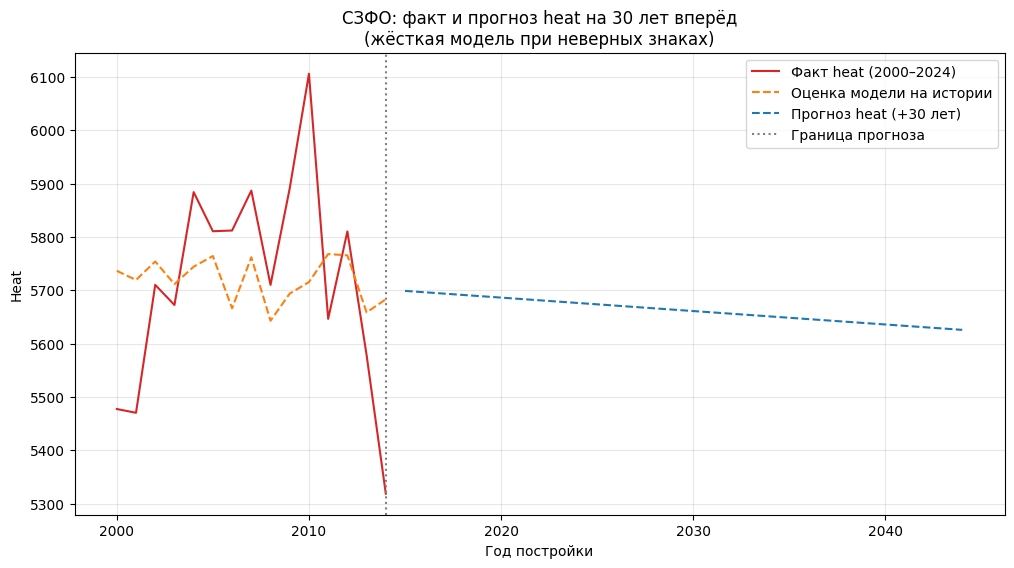

    built_year         heat    heat_pred     type
5       2005.0  5810.900000  5764.473418     Факт
6       2006.0  5812.272727  5666.384304     Факт
7       2007.0  5887.110000  5762.177773     Факт
8       2008.0  5710.272727  5643.145255     Факт
9       2009.0  5891.554545  5694.058426     Факт
10      2010.0  6106.254545  5715.566061     Факт
11      2011.0  5646.627273  5768.159119     Факт
12      2012.0  5810.581818  5765.703161     Факт
13      2013.0  5578.709091  5658.760666     Факт
14      2014.0  5318.754545  5683.346679     Факт
15      2015.0  5699.067470          NaN  Прогноз
16      2016.0  5696.547570          NaN  Прогноз
17      2017.0  5694.027671          NaN  Прогноз
18      2018.0  5691.507771          NaN  Прогноз
19      2019.0  5688.987872          NaN  Прогноз
20      2020.0  5686.467972          NaN  Прогноз
21      2021.0  5683.948073          NaN  Прогноз
22      2022.0  5681.428173          NaN  Прогноз
23      2023.0  5678.908273          NaN  Прогноз


In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.optimize import minimize
from sklearn.metrics import r2_score

# ===== 0) Фильтр по годам и агрегация =====
mask = (df_final["built_year"] >= 2000) & (df_final["built_year"] <= 2014)
df_yearly = (
    df_final.loc[mask, ["built_year", "heat", "area_eff_cumsum", "climate_winter"]]
            .groupby("built_year", as_index=False)
            .mean()
)
df_yearly[["heat", "area_eff_cumsum", "climate_winter"]] = df_yearly[["heat", "area_eff_cumsum", "climate_winter"]].interpolate(method="linear")

# ===== 1) Базовая линейная регрессия =====
X = df_yearly[["area_eff_cumsum", "climate_winter"]].values
y = df_yearly["heat"].values

reg = LinearRegression()
reg.fit(X, y)
coefs_base = reg.coef_
intercept_base = reg.intercept_

print("Базовая регрессия:")
print("Intercept:", intercept_base)
print("Coef area_eff_cumsum:", coefs_base[0])
print("Coef climate_winter:", coefs_base[1])

# ===== 2) Проверяем знаки и при необходимости применяем жёсткую модель =====
# ожидаем: area >=0, climate <=0
apply_hard = False
if coefs_base[0] < 0 or coefs_base[1] > 0:
    apply_hard = True
    print("\nНеверные знаки, применяем жёсткую регрессию...")

if apply_hard:
    def mse_beta(beta, X, y):
        return np.mean((y - X @ beta) ** 2)
    
    bounds = [(0, None),    # area_eff_cumsum >=0
              (None, 0)]    # climate_winter <=0
    
    res = minimize(mse_beta, coefs_base, args=(X, y), bounds=bounds, method="L-BFGS-B")
    beta_fixed = res.x
    intercept_fixed = np.mean(y) - np.mean(X @ beta_fixed)
    
    y_pred = intercept_fixed + X @ beta_fixed
    print("Жёсткая модель:")
    print("Intercept:", intercept_fixed)
    print("Coef area_eff_cumsum:", beta_fixed[0])
    print("Coef climate_winter:", beta_fixed[1])
    r2_model = r2_score(y, y_pred)
    print("R2 жёсткой модели:", r2_model)
else:
    beta_fixed = coefs_base
    intercept_fixed = intercept_base
    y_pred = reg.predict(X)
    r2_model = r2_score(y, y_pred)
    print("R2 базовой модели:", r2_model)

# ===== 3) Сохраняем предсказания на истории =====
df_yearly["heat_pred"] = y_pred

# ===== 4) Прогноз на 30 лет вперёд =====
last_year = int(df_yearly["built_year"].max())
future_years = np.arange(last_year + 1, last_year + 31)

coef_area = np.polyfit(df_yearly["built_year"], df_yearly["area_eff_cumsum"], 1)
coef_clim = np.polyfit(df_yearly["built_year"], df_yearly["climate_winter"], 1)
area_trend = np.poly1d(coef_area)
clim_trend = np.poly1d(coef_clim)

future_area = area_trend(future_years)
future_climate = clim_trend(future_years)

future_data = pd.DataFrame({
    "built_year": future_years,
    "area_eff_cumsum": future_area,
    "climate_winter": future_climate
})
future_data["heat_pred"] = intercept_fixed + future_data[["area_eff_cumsum", "climate_winter"]].values @ beta_fixed
future_data["type"] = "Прогноз"

# ===== 5) Объединяем факт и прогноз =====
df_hist = df_yearly[["built_year", "heat", "heat_pred"]].copy()
df_hist["type"] = "Факт"
df_all = pd.concat([df_hist, future_data[["built_year", "heat_pred", "type"]].rename(columns={"heat_pred":"heat"})],
                   ignore_index=True).sort_values("built_year")

# ===== 6) График =====
plt.figure(figsize=(12,6))
hist = df_all[df_all["type"] == "Факт"]
fut = df_all[df_all["type"] == "Прогноз"]

plt.plot(hist["built_year"], hist["heat"], label="Факт heat (2000–2024)", color="tab:red")
plt.plot(hist["built_year"], hist["heat_pred"], label="Оценка модели на истории", color="tab:orange", linestyle="--")
plt.plot(fut["built_year"], fut["heat"], label="Прогноз heat (+30 лет)", color="tab:blue", linestyle="--")

plt.axvline(x=last_year, color="gray", linestyle=":", label="Граница прогноза")
plt.title("СЗФО: факт и прогноз heat на 30 лет вперёд\n(жёсткая модель при неверных знаках)")
plt.xlabel("Год постройки")
plt.ylabel("Heat")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# ===== 7) Таблица =====
print(df_all.tail(40))


Intercept: 5650.404375000001
Coef area_eff_cumsum (std): -54.64652663212839
Coef climate_winter (std): -37.45397326449513


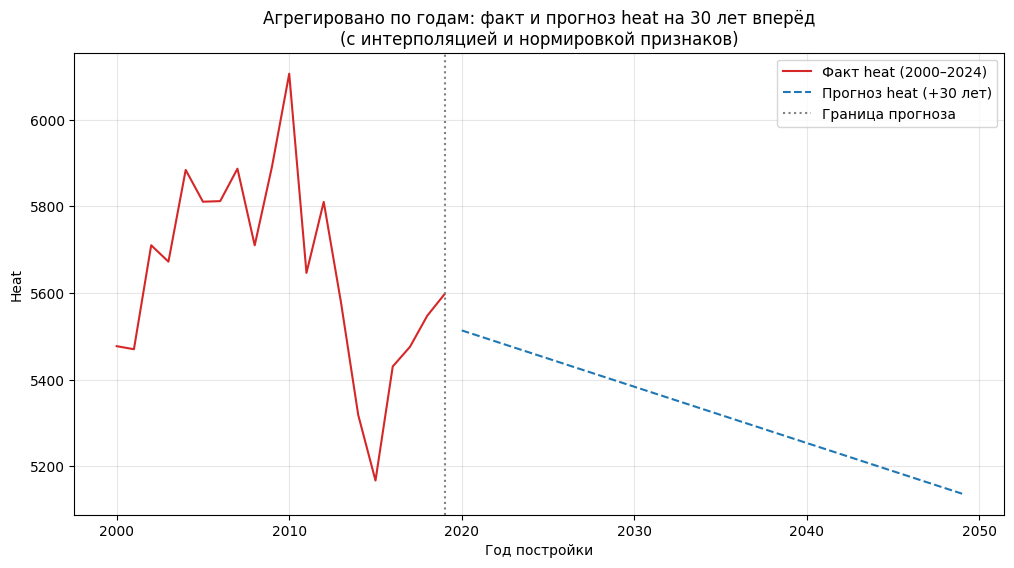

In [35]:
#СЗФО: регрессия на нормированных данных + прогноз на 30 лет вперёд

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# 0) гарантируем числовые типы
for c in ["built_year", "heat", "area_eff_cumsum", "climate_winter"]:
    df_final[c] = pd.to_numeric(df_final[c], errors="coerce")

# 1) агрегация по годам (2000–2024) и снятие возможных дублей лет
mask = (df_final["built_year"] >= 2000) & (df_final["built_year"] <= 2019)
df_yearly = (
    df_final.loc[mask, ["built_year", "heat", "area_eff_cumsum", "climate_winter"]]
            .groupby("built_year", as_index=False)
            .mean()
            .sort_values("built_year")
)

# на всякий случай удалим дубликаты лет (хотя groupby уже их схлопывает)
df_yearly = df_yearly.drop_duplicates(subset=["built_year"], keep="first")

# 2) ставим годы индексом, интерполируем по индексу, возвращаем столбец лет
df_yearly = df_yearly.set_index("built_year")
df_yearly = df_yearly.interpolate(method="index")  # линейно по оси лет
df_yearly = df_yearly.reset_index()

# 3) нормировка признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_yearly[["area_eff_cumsum", "climate_winter"]])
y = df_yearly["heat"].values

# 4) модель
reg = LinearRegression()
reg.fit(X_scaled, y)

print("Intercept:", reg.intercept_)
print("Coef area_eff_cumsum (std):", reg.coef_[0])
print("Coef climate_winter (std):", reg.coef_[1])

# 5) предсказание на истории
df_yearly["heat_pred"] = reg.predict(X_scaled)

# 6) прогноз на 30 лет вперёд
last_year = int(df_yearly["built_year"].max())
future_years = np.arange(last_year + 1, last_year + 31)

# линейные тренды для признаков по истории
coef_area = np.polyfit(df_yearly["built_year"], df_yearly["area_eff_cumsum"], 1)
coef_clim = np.polyfit(df_yearly["built_year"], df_yearly["climate_winter"], 1)
area_trend = np.poly1d(coef_area)
clim_trend = np.poly1d(coef_clim)

future_area = area_trend(future_years)
future_climate = clim_trend(future_years)

# масштабируем будущее — строго в том же порядке колонок:
future_scaled = scaler.transform(
    pd.DataFrame({"area_eff_cumsum": future_area,
                  "climate_winter": future_climate})
)

future_data = pd.DataFrame({
    "built_year": future_years,
    "area_eff_cumsum": future_area,
    "climate_winter": future_climate,
    "heat": reg.predict(future_scaled),
    "type": "Прогноз"
})

# 7) итоговая таблица факт+прогноз (с правильной меткой type)
df_hist = df_yearly[["built_year", "heat"]].copy()
df_hist["type"] = "Факт"

df_all = pd.concat([df_hist, future_data[["built_year", "heat", "type"]]],
                   ignore_index=True).sort_values("built_year")

# 8) график
plt.figure(figsize=(12,6))
hist = df_all[df_all["type"] == "Факт"]
fut  = df_all[df_all["type"] == "Прогноз"]

plt.plot(hist["built_year"], hist["heat"], label="Факт heat (2000–2024)", color="tab:red")
plt.plot(fut["built_year"],  fut["heat"],  label="Прогноз heat (+30 лет)", color="tab:blue", linestyle="--")

plt.axvline(x=last_year, color="gray", linestyle=":", label="Граница прогноза")
plt.title("Агрегировано по годам: факт и прогноз heat на 30 лет вперёд\n(с интерполяцией и нормировкой признаков)")
plt.xlabel("Год постройки")
plt.ylabel("Heat")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


R2 базовой модели: 0.1418
Базовые коэффициенты: [-54.64652663 -37.45397326] Intercept: 5650.404375000001
R2 жёсткой модели: 0.1020
Финальные коэффициенты с фиксированными знаками: [  0.        -70.2767069] Intercept: 5650.404375000001


C:\Users\Артем\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


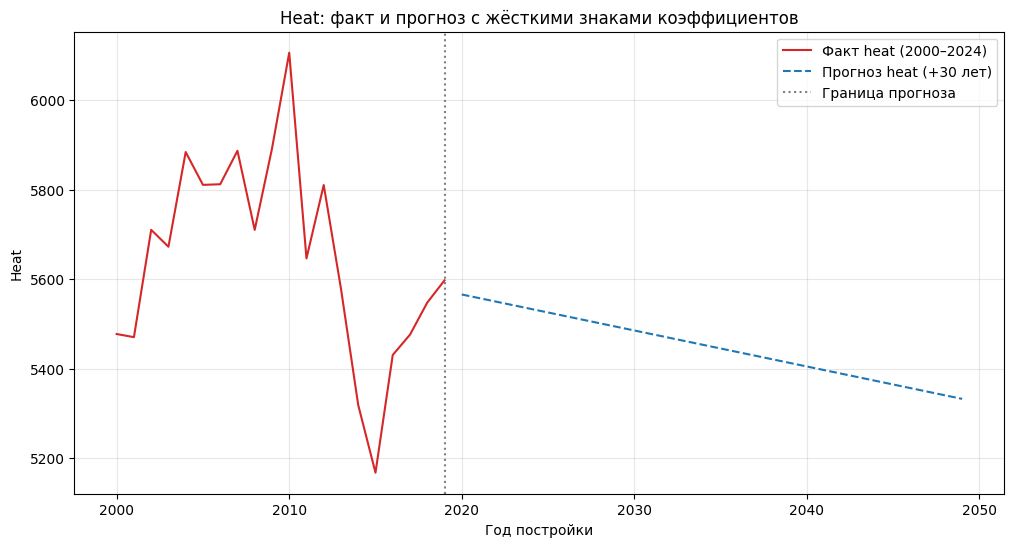

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from scipy.optimize import minimize

# ===== 0) Подготовка данных =====
for c in ["built_year", "heat", "area_eff_cumsum", "climate_winter"]:
    df_final[c] = pd.to_numeric(df_final[c], errors="coerce")

mask = (df_final["built_year"] >= 2000) & (df_final["built_year"] <= 2019)
df_yearly = (
    df_final.loc[mask, ["built_year", "heat", "area_eff_cumsum", "climate_winter"]]
            .groupby("built_year", as_index=False)
            .mean()
            .sort_values("built_year")
)
df_yearly = df_yearly.drop_duplicates(subset=["built_year"], keep="first")
df_yearly = df_yearly.set_index("built_year").interpolate(method="index").reset_index()

# ===== 1) Нормировка признаков =====
scaler = StandardScaler()
X = df_yearly[["area_eff_cumsum", "climate_winter"]].values
X_scaled = scaler.fit_transform(X)
y = df_yearly["heat"].values

# ===== 2) Базовая линейная регрессия =====
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_scaled, y)
y_pred_base = reg.predict(X_scaled)
r2_base = r2_score(y, y_pred_base)
print(f"R2 базовой модели: {r2_base:.4f}")
print("Базовые коэффициенты:", reg.coef_, "Intercept:", reg.intercept_)

# ===== 3) Жёсткое закрепление знаков =====
def mse_beta(beta, X, y):
    """Функция потерь (MSE)"""
    return np.mean((y - X @ beta) ** 2)

# Bounds: area >=0, climate <=0
bounds = [(0, None),  # area_eff_cumsum >= 0
          (None, 0)]  # climate_winter <= 0

res = minimize(mse_beta, reg.coef_, args=(X_scaled, y), bounds=bounds, method="L-BFGS-B")
beta_fixed = res.x
intercept_fixed = np.mean(y) - np.mean(X_scaled @ beta_fixed)

y_pred_fixed = intercept_fixed + X_scaled @ beta_fixed
r2_fixed = r2_score(y, y_pred_fixed)
print(f"R2 жёсткой модели: {r2_fixed:.4f}")
print("Финальные коэффициенты с фиксированными знаками:", beta_fixed, "Intercept:", intercept_fixed)

# ===== 4) Сохраняем предсказание на истории =====
df_yearly["heat_pred"] = y_pred_fixed

# ===== 5) Прогноз на 30 лет вперёд =====
last_year = int(df_yearly["built_year"].max())
future_years = np.arange(last_year + 1, last_year + 31)

coef_area_trend = np.polyfit(df_yearly["built_year"], df_yearly["area_eff_cumsum"], 1)
coef_clim_trend = np.polyfit(df_yearly["built_year"], df_yearly["climate_winter"], 1)
area_trend = np.poly1d(coef_area_trend)
clim_trend = np.poly1d(coef_clim_trend)

future_area = area_trend(future_years)
future_climate = clim_trend(future_years)

future_scaled = scaler.transform(
    pd.DataFrame({"area_eff_cumsum": future_area, "climate_winter": future_climate})
)
future_heat = intercept_fixed + future_scaled @ beta_fixed

future_data = pd.DataFrame({
    "built_year": future_years,
    "area_eff_cumsum": future_area,
    "climate_winter": future_climate,
    "heat": future_heat,
    "type": "Прогноз"
})

# ===== 6) Объединяем факт и прогноз =====
df_hist = df_yearly[["built_year", "heat"]].copy()
df_hist["type"] = "Факт"
df_all = pd.concat([df_hist, future_data[["built_year", "heat", "type"]]],
                   ignore_index=True).sort_values("built_year")

# ===== 7) График =====
plt.figure(figsize=(12,6))
hist = df_all[df_all["type"] == "Факт"]
fut  = df_all[df_all["type"] == "Прогноз"]

plt.plot(hist["built_year"], hist["heat"], label="Факт heat (2000–2024)", color="tab:red")
plt.plot(fut["built_year"],  fut["heat"],  label="Прогноз heat (+30 лет)", color="tab:blue", linestyle="--")

plt.axvline(x=last_year, color="gray", linestyle=":", label="Граница прогноза")
plt.title("Heat: факт и прогноз с жёсткими знаками коэффициентов")
plt.xlabel("Год постройки")
plt.ylabel("Heat")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


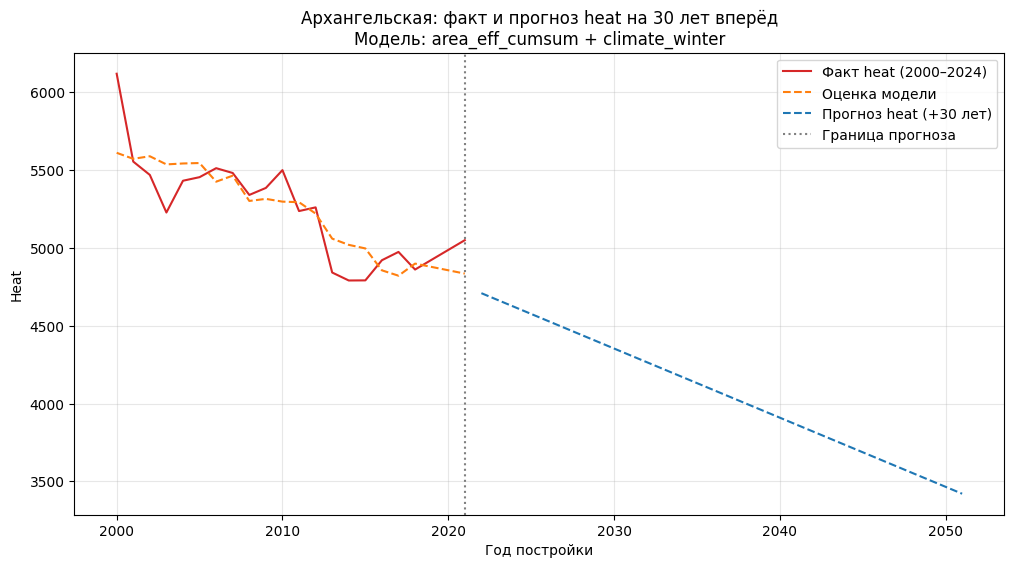

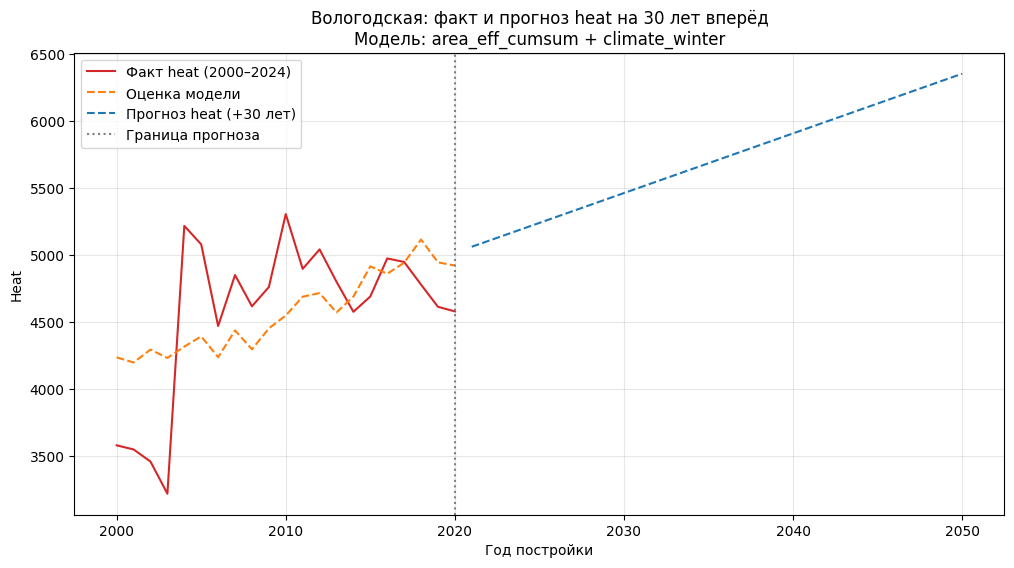

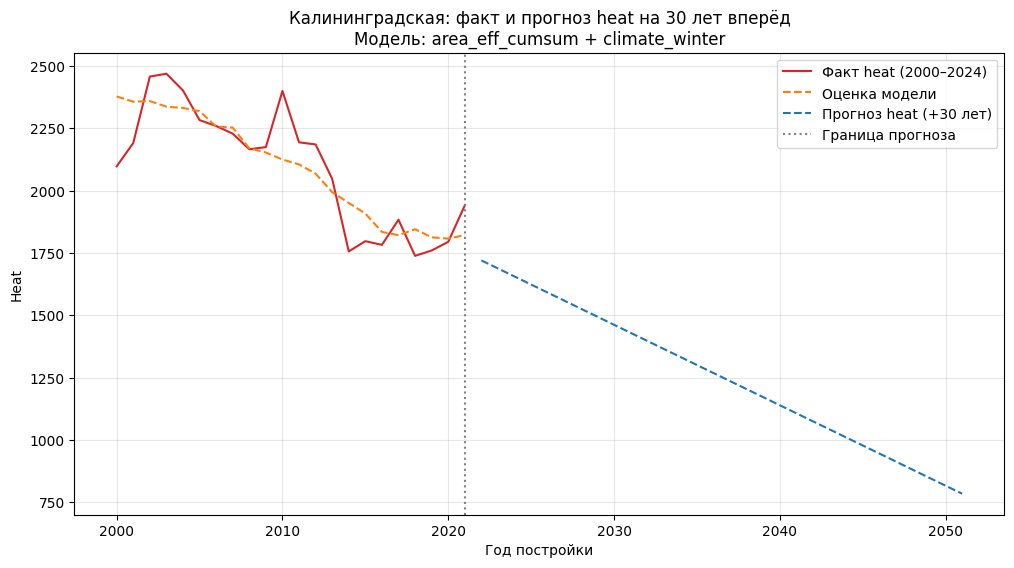

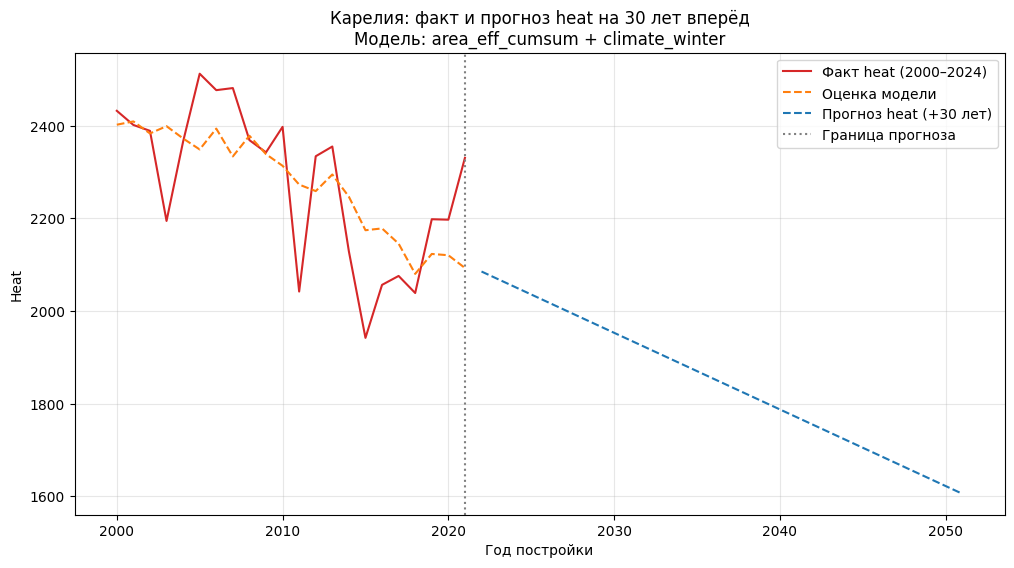

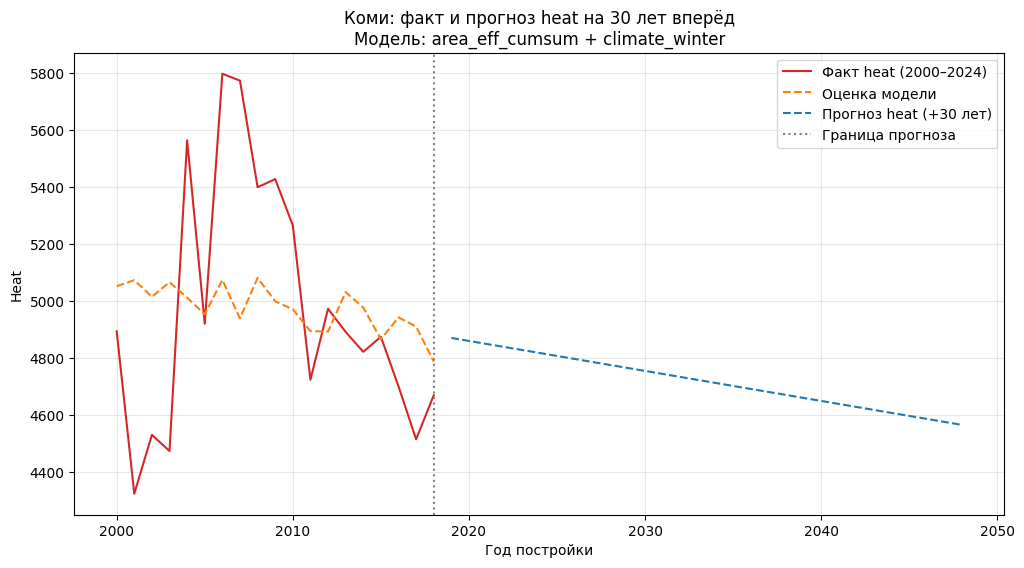

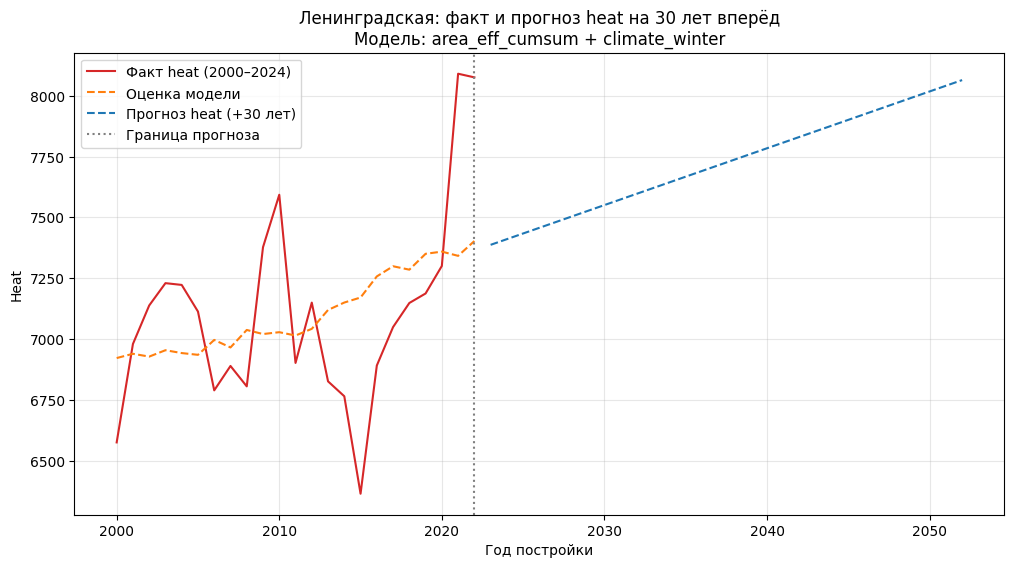

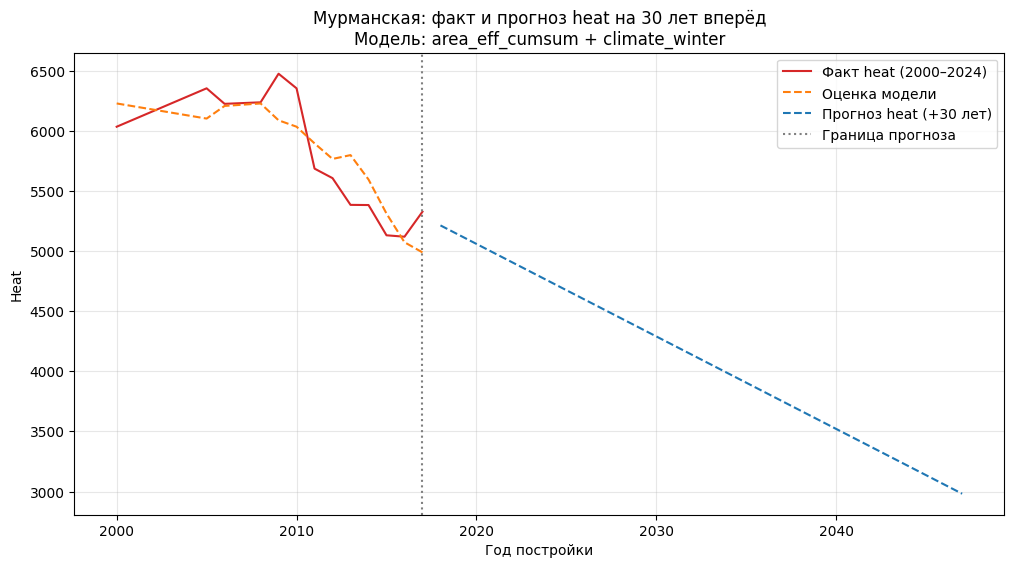

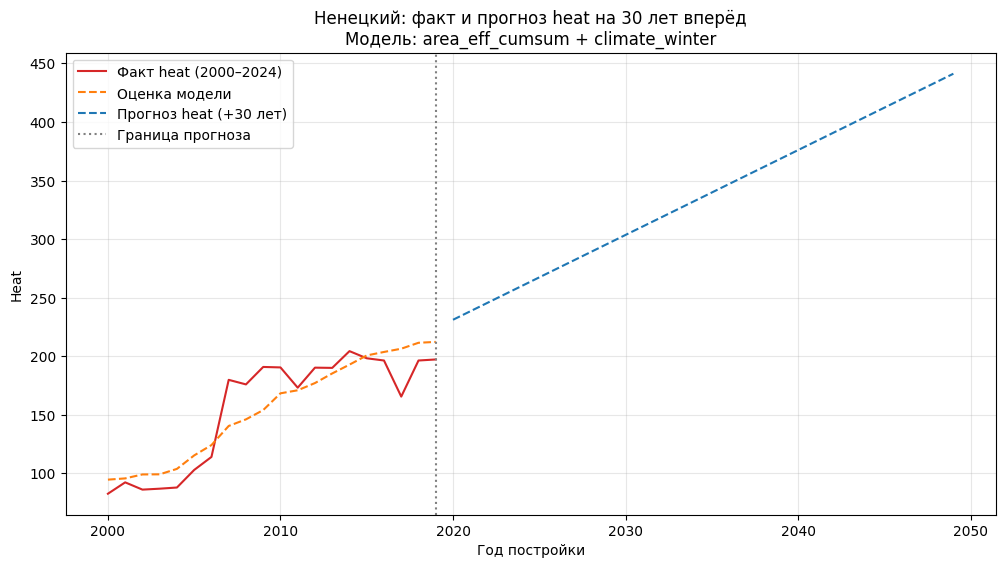

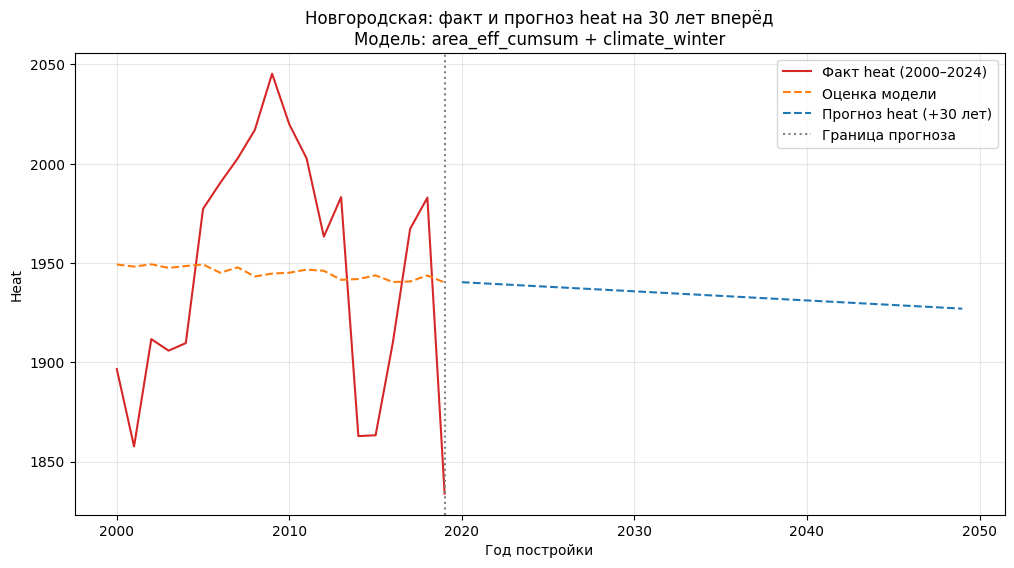

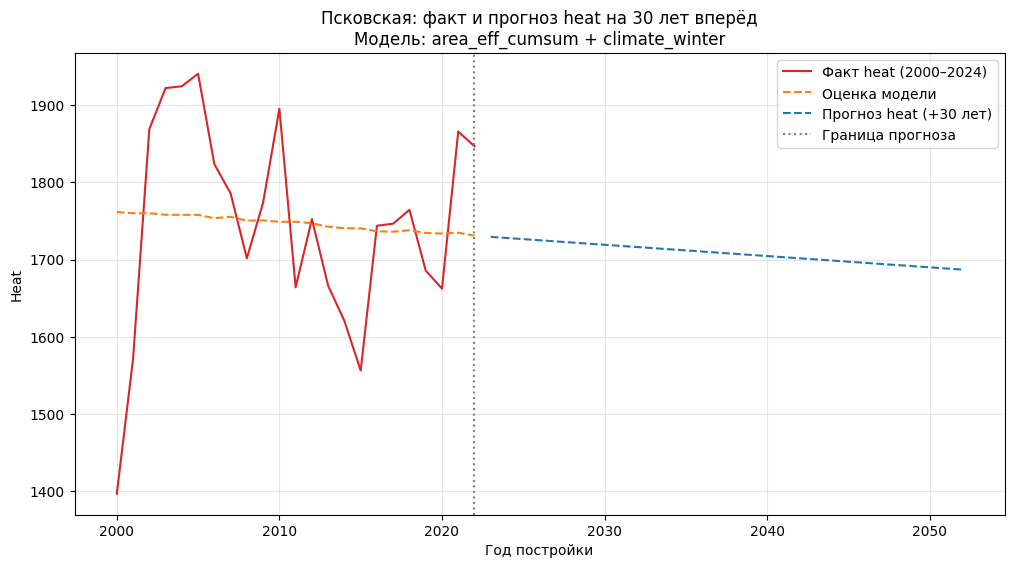

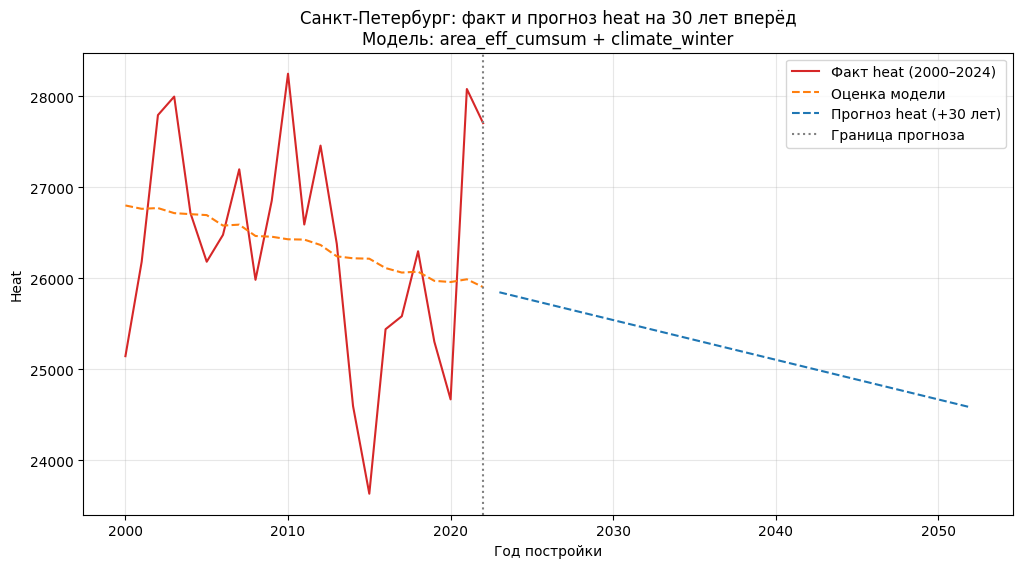

             Регион      Intercept  Coef_area_eff_cumsum  Coef_climate_winter  \
0     Архангельская   15141.326383             -0.000495           -86.419732   
1       Вологодская   -3690.101012              0.000306          -173.505670   
2   Калининградская    3488.642745             -0.000095           -30.919360   
3           Карелия    6206.488914             -0.000228            50.889885   
4              Коми   10930.343088             -0.000261           125.390322   
5     Ленинградская    6461.406153              0.000030            46.298846   
6        Мурманская  233682.188705             -0.010843           121.089096   
7          Ненецкий     -27.238725              0.000270            -0.175990   
8      Новгородская    1926.993183             -0.000002            -3.402311   
9         Псковская    1837.110942             -0.000011            -2.964467   
10  Санкт-Петербург   27940.475196             -0.000017           -66.293879   

          R2  
0   0.689354

In [37]:
#СЗФО по регионам: регрессия обычная + прогноз на 30 лет вперёд

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

regions = df_final["formalname_region"].unique()

results = []  # сюда будем складывать коэффициенты регрессии

for region in regions:
    mask = (
        (df_final["built_year"] >= 2000)
        & (df_final["built_year"] <= 2024)
        & (df_final["formalname_region"] == region)
    )
    df_yearly = (
        df_final.loc[mask, ["built_year", "heat", "area_eff_cumsum", "climate_winter"]]
        .groupby("built_year", as_index=False)
        .mean()
    )
    
    if df_yearly.empty:
        continue  # если по региону нет данных, пропускаем

    # интерполяция
    df_yearly[["heat", "area_eff_cumsum", "climate_winter"]] = (
        df_yearly[["heat", "area_eff_cumsum", "climate_winter"]]
        .interpolate(method="linear")
    )

    # регрессия
    X = df_yearly[["area_eff_cumsum", "climate_winter"]]
    y = df_yearly["heat"]
    reg = LinearRegression()
    reg.fit(X, y)

    # сохраняем коэффициенты
    results.append({
        "Регион": region,
        "Intercept": reg.intercept_,
        "Coef_area_eff_cumsum": reg.coef_[0],
        "Coef_climate_winter": reg.coef_[1],
        "R2": reg.score(X, y)  # качество на истории
    })

    # прогноз на 30 лет
    last_year = int(df_yearly["built_year"].max())
    future_years = np.arange(last_year + 1, last_year + 31)

    coef_area = np.polyfit(df_yearly["built_year"], df_yearly["area_eff_cumsum"], 1)
    coef_clim = np.polyfit(df_yearly["built_year"], df_yearly["climate_winter"], 1)
    area_trend = np.poly1d(coef_area)
    clim_trend = np.poly1d(coef_clim)

    future_area = area_trend(future_years)
    future_climate = clim_trend(future_years)

    future_data = pd.DataFrame({
        "built_year": future_years,
        "area_eff_cumsum": future_area,
        "climate_winter": future_climate
    })
    future_data["heat_pred"] = reg.predict(future_data[["area_eff_cumsum", "climate_winter"]])

    # прогноз и история
    df_yearly["heat_pred"] = reg.predict(df_yearly[["area_eff_cumsum", "climate_winter"]])

    df_all = pd.concat(
        [
            df_yearly.assign(type="Факт"),
            future_data.rename(columns={"heat_pred": "heat"}).assign(type="Прогноз")
        ],
        ignore_index=True
    )

    # график
    plt.figure(figsize=(12,6))
    hist = df_all[df_all["type"] == "Факт"]
    fut = df_all[df_all["type"] == "Прогноз"]

    plt.plot(hist["built_year"], hist["heat"], label="Факт heat (2000–2024)", color="tab:red")
    plt.plot(hist["built_year"], hist["heat_pred"], label="Оценка модели", color="tab:orange", linestyle="--")
    plt.plot(fut["built_year"], fut["heat"], label="Прогноз heat (+30 лет)", color="tab:blue", linestyle="--")

    plt.axvline(x=last_year, color="gray", linestyle=":", label="Граница прогноза")
    plt.title(f"{region}: факт и прогноз heat на 30 лет вперёд\nМодель: area_eff_cumsum + climate_winter")
    plt.xlabel("Год постройки")
    plt.ylabel("Heat")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

# Собираем все коэффициенты в таблицу
df_results = pd.DataFrame(results)

# выводим
print(df_results)

# можно сохранить в Excel
#df_results.to_excel("regression_coeffs_by_region.xlsx", index=False)


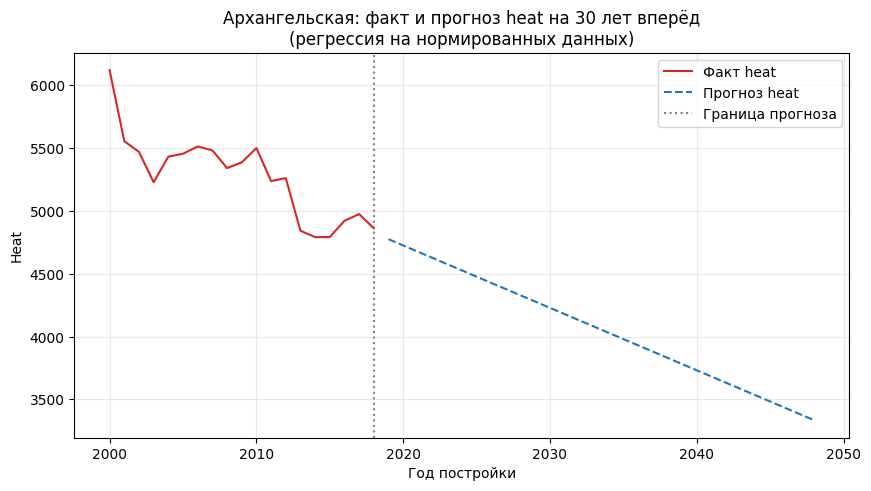

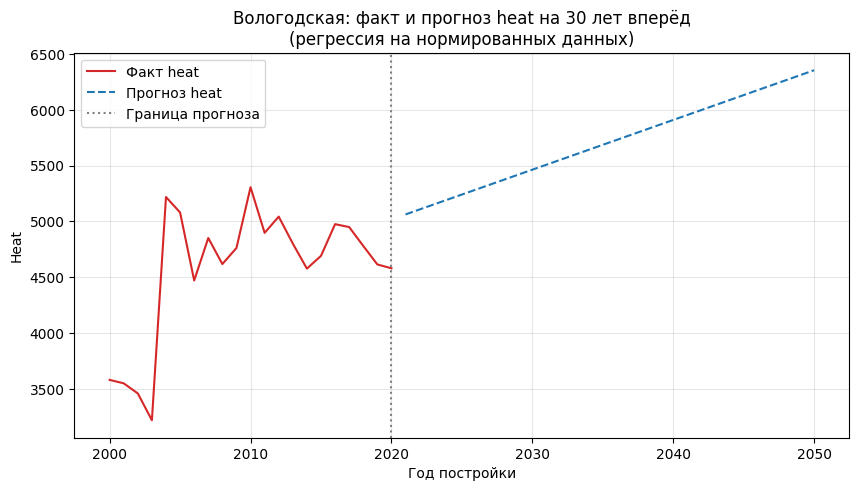

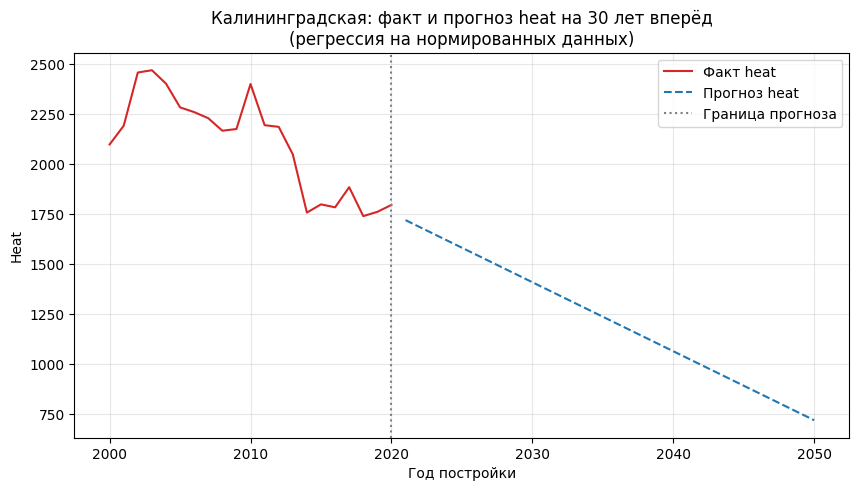

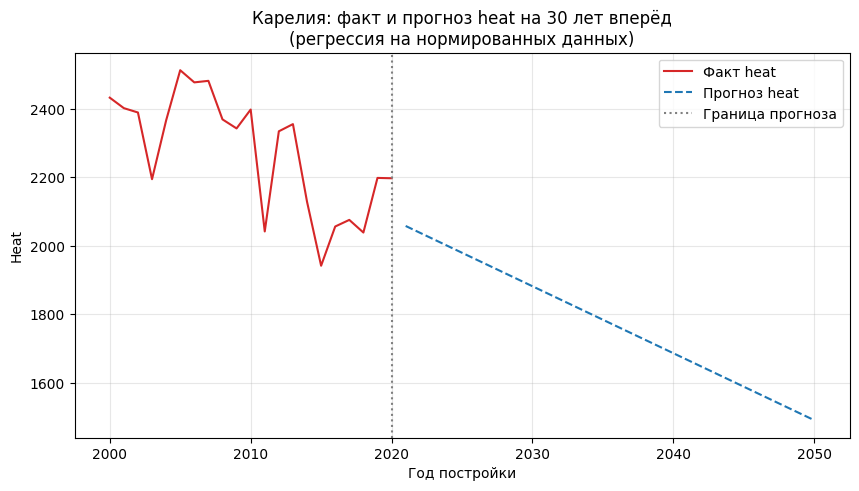

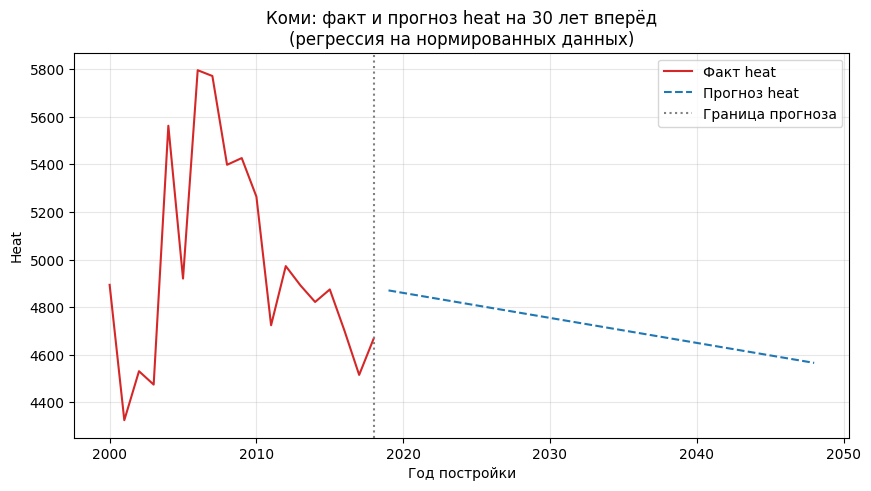

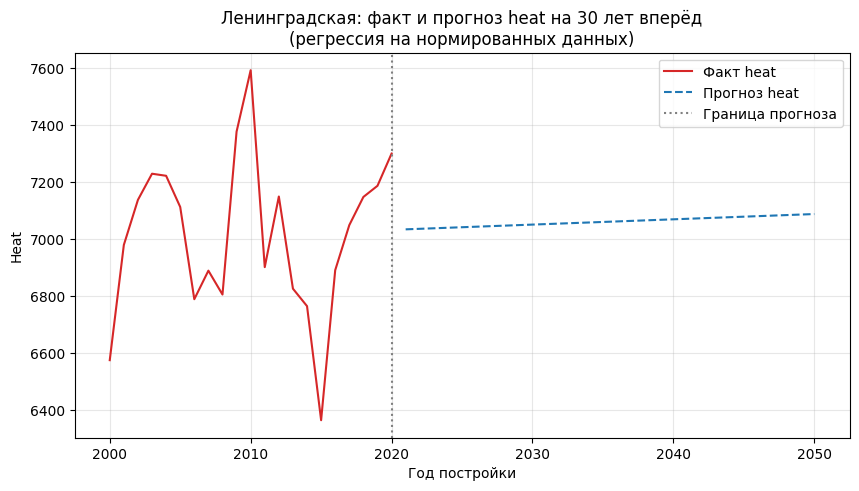

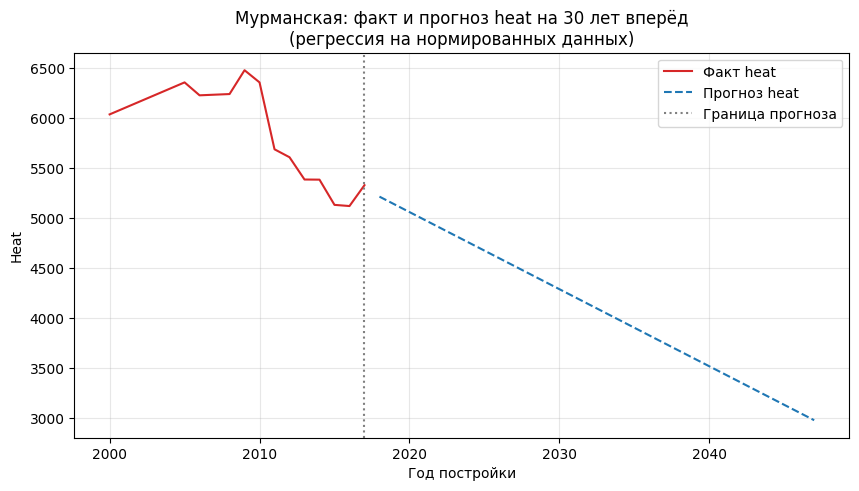

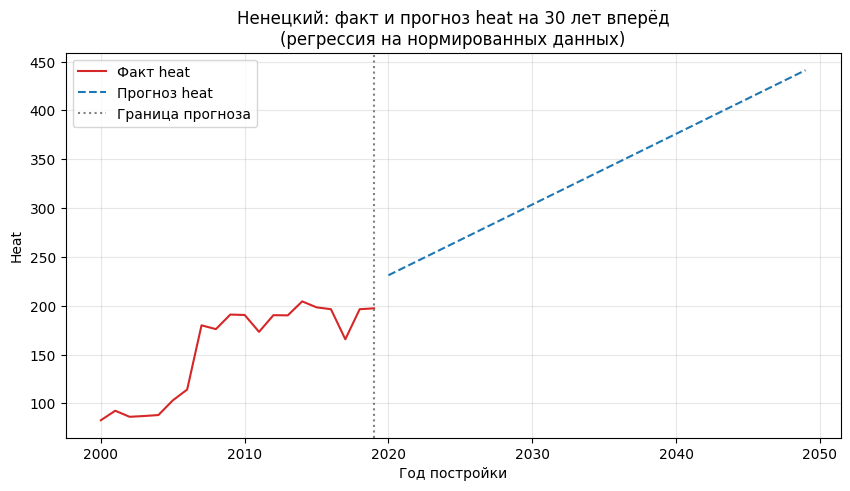

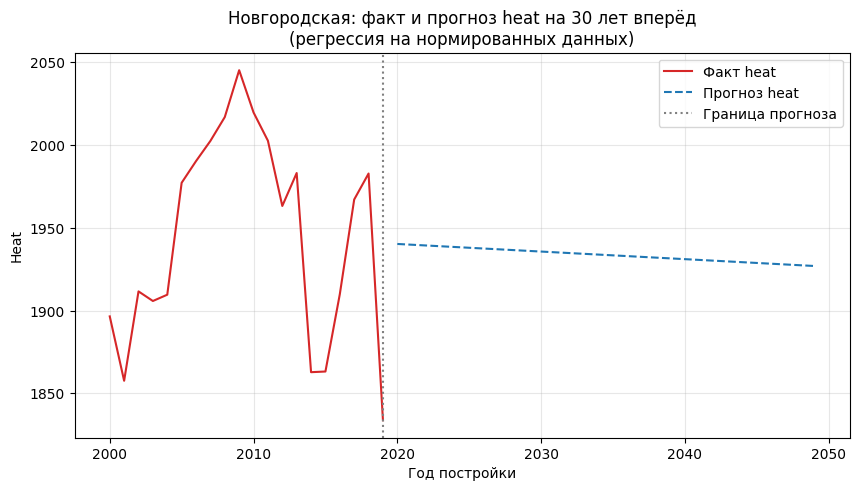

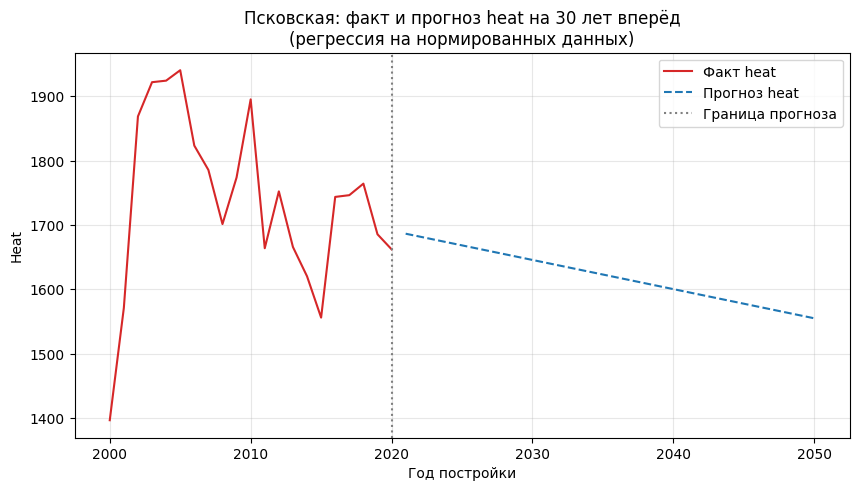

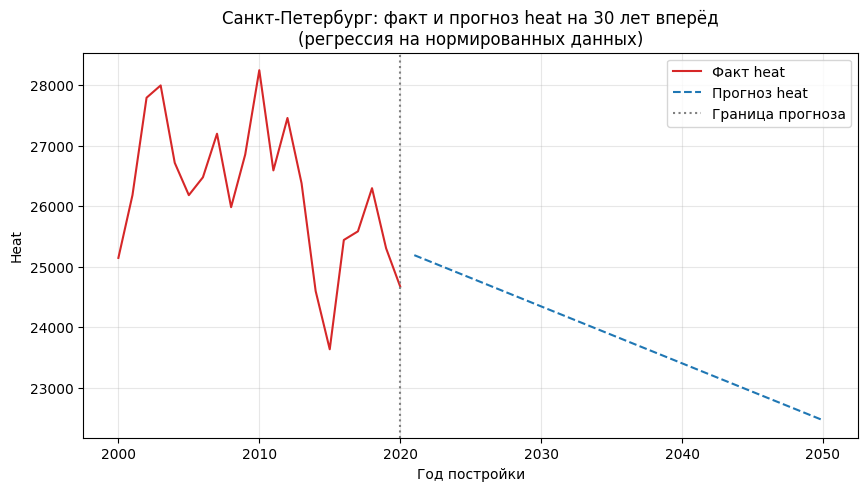

             Регион     Intercept  Coef_area_eff_cumsum  Coef_climate_winter  \
0     Архангельская   5271.915789           -248.831778           -46.979064   
1       Вологодская   4571.874762            348.177419          -105.067644   
2   Калининградская   2098.442381           -200.386514           -16.280781   
3           Карелия   2273.126667           -150.472886            40.691351   
4              Коми   4975.457895           -101.392147            70.532039   
5     Ленинградская   7013.897143             35.189797           -31.006902   
6        Мурманская   5793.053846           -451.849154            70.137108   
7          Ненецкий    155.134500             42.287227            -0.102322   
8      Новгородская   1945.069000             -1.348321            -1.978123   
9         Псковская   1736.392381            -15.586331           -17.021745   
10  Санкт-Петербург  26226.021429           -388.863031          -259.540265   

    R2 (на истории)  
0          0.7091

In [38]:
#СЗФО по регионам: регрессия нормированная + прогноз на 30 лет вперёд

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

regions = df_final["formalname_region"].unique()

results = []  # сюда сложим коэффициенты регрессий

for region in regions:
    # 1) фильтр по региону и годам
    mask = (df_final["built_year"] >= 2000) & (df_final["built_year"] <= 2020) & \
           (df_final["formalname_region"] == region)
    
    df_yearly = (
        df_final.loc[mask, ["built_year", "heat", "area_eff_cumsum", "climate_winter"]]
                .groupby("built_year", as_index=False)
                .mean()
                .sort_values("built_year")
    )
    
    if df_yearly.empty:
        continue  # пропускаем регионы без данных
    
    df_yearly = df_yearly.drop_duplicates(subset=["built_year"], keep="first")
    df_yearly = df_yearly.set_index("built_year").interpolate(method="index").reset_index()
    
    # 2) нормировка признаков
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df_yearly[["area_eff_cumsum", "climate_winter"]])
    y = df_yearly["heat"].values
    
    # 3) регрессия
    reg = LinearRegression()
    reg.fit(X_scaled, y)
    
    # сохраняем коэффициенты
    results.append({
        "Регион": region,
        "Intercept": reg.intercept_,
        "Coef_area_eff_cumsum": reg.coef_[0],
        "Coef_climate_winter": reg.coef_[1],
        "R2 (на истории)": reg.score(X_scaled, y)
    })
    
    # 4) прогноз на 30 лет вперёд
    last_year = int(df_yearly["built_year"].max())
    future_years = np.arange(last_year + 1, last_year + 31)

    coef_area = np.polyfit(df_yearly["built_year"], df_yearly["area_eff_cumsum"], 1)
    coef_clim = np.polyfit(df_yearly["built_year"], df_yearly["climate_winter"], 1)
    area_trend = np.poly1d(coef_area)
    clim_trend = np.poly1d(coef_clim)

    future_area = area_trend(future_years)
    future_climate = clim_trend(future_years)

    future_scaled = scaler.transform(
        pd.DataFrame({"area_eff_cumsum": future_area,
                      "climate_winter": future_climate})
    )
    
    future_data = pd.DataFrame({
        "built_year": future_years,
        "heat": reg.predict(future_scaled),
        "type": "Прогноз"
    })

    # 5) история
    df_hist = df_yearly[["built_year", "heat"]].copy()
    df_hist["type"] = "Факт"
    
    df_all = pd.concat([df_hist, future_data], ignore_index=True).sort_values("built_year")
    
    # 6) график
    plt.figure(figsize=(10,5))
    hist = df_all[df_all["type"] == "Факт"]
    fut  = df_all[df_all["type"] == "Прогноз"]
    
    plt.plot(hist["built_year"], hist["heat"], label="Факт heat", color="tab:red")
    plt.plot(fut["built_year"],  fut["heat"],  label="Прогноз heat", color="tab:blue", linestyle="--")
    
    plt.axvline(x=last_year, color="gray", linestyle=":", label="Граница прогноза")
    plt.title(f"{region}: факт и прогноз heat на 30 лет вперёд\n(регрессия на нормированных данных)")
    plt.xlabel("Год постройки")
    plt.ylabel("Heat")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

# 7) таблица коэффициентов
df_results = pd.DataFrame(results)
print(df_results)

# можно сохранить в Excel:
# df_results.to_excel("regression_coeffs_by_region.xlsx", index=False)
